<a href="https://colab.research.google.com/github/Stanlee-Sam/Supervised-Learning-Regression-Checkpoint/blob/main/Supervised_Learning_Regression_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/5G_energy_consumption_dataset.csv')

df.head()



,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719


In [ ]:
#check the dataset general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB


The dataset has 6 columns and 92629 rows

It has two datatypes: float and object

Has a memory usage of 4.2MB

In [ ]:
#check for missing values
df.isnull().sum()

,0
Time,0
BS,0
Energy,0
load,0
ESMODE,0
TXpower,0


In [ ]:
#check for duplicates in the dataset
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.describe(include = 'all')

,Time,BS,Energy,load,ESMODE,TXpower
count,92629,92629,92629.000000,92629.000000,92629.000000,92629.000000
unique,168,923,NaN,NaN,NaN,NaN
top,20230102 230000,B_583,NaN,NaN,NaN,NaN
freq,766,130,NaN,NaN,NaN,NaN
mean,NaN,NaN,28.138997,0.244705,0.081361,6.765427
std,NaN,NaN,13.934645,0.234677,0.382317,0.309929
min,NaN,NaN,0.747384,0.000000,0.000000,5.381166
25%,NaN,NaN,18.236173,0.057370,0.000000,6.427504
50%,NaN,NaN,24.065770,0.165550,0.000000,6.875934
75%,NaN,NaN,35.724963,0.363766,0.000000,6.875934


In [ ]:
q1 = df['Energy'].quantile(0.25)
q3 = df['Energy'].quantile(0.75)

IQR = q3 - q1

energy_lower_limit = q1 - 1.5 * IQR
energy_upper_limit = q3 + 1.5 * IQR

df[(df['Energy'] < energy_lower_limit) | (df['Energy'] > energy_upper_limit)]


,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
5,20230101 070000,B_0,82.959641,0.351585,0.0,7.101719
6,20230101 080000,B_0,91.031390,0.759298,0.0,7.101719
7,20230101 090000,B_0,78.176383,0.887798,0.0,7.101719
8,20230101 100000,B_0,72.645740,0.624745,0.0,7.101719
...,...,...,...,...,...,...
92205,20230102 130000,B_983,64.573991,0.452729,0.0,8.375336
92206,20230102 150000,B_983,74.588939,0.573759,0.0,8.375336
92208,20230102 170000,B_983,64.275037,0.465338,0.0,8.375336
92209,20230102 180000,B_983,82.212257,0.634722,0.0,8.375336


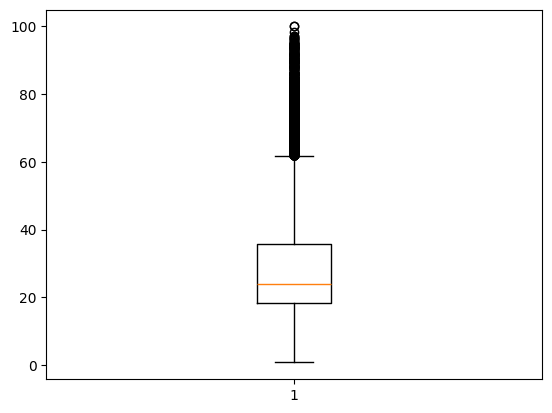

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df['Energy'])
plt.show()


In [ ]:
df['Energy'].skew()



np.float64(1.0868815525085438)

In [ ]:
#log transform to fix skewness
import numpy as np
df['Energy'] = np.log1p(df['Energy'])
print(df['Energy'].skew())


-0.010387508085306474


In [ ]:
df['BS'].nunique()

923

In [ ]:
df['BS'].head(10)


,BS
0,B_0
1,B_0
2,B_0
3,B_0
4,B_0
5,B_0
6,B_0
7,B_0
8,B_0
9,B_0


In [ ]:
df['BS'].tail(10)

,BS
92619,B_1018
92620,B_1018
92621,B_1018
92622,B_1018
92623,B_1018
92624,B_1018
92625,B_1018
92626,B_1018
92627,B_1018
92628,B_1018


In [ ]:
#BS frequency (Category with many values) - label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['BS'] = le.fit_transform(df['BS'])
print(df['BS'])

0         0
1         0
2         0
3         0
4         0
         ..
92624    10
92625    10
92626    10
92627    10
92628    10
Name: BS, Length: 92629, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  int64  
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.2+ MB


In [ ]:
#Extract useful features
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d %H%M%S')
df['hour'] = df['Time'].dt.hour
df['day'] = df['Time'].dt.day
df['weekday'] = df['Time'].dt.weekday


In [ ]:
!pip install ydata-profiling

In [ ]:
# from ydata_profiling import ProfileReport

# profile = ProfileReport(df, title = '5G_Energy_consumption_Report', explorative= True)

# profile.to_file('5G_Energy_consumption_Report.html')

In [ ]:
df.head()

,Time,BS,Energy,load,ESMODE,TXpower,hour,day,weekday
0,2023-01-01 01:00:00,0,4.178610,0.487936,0.0,7.101719,1,1,6
1,2023-01-01 02:00:00,0,4.041372,0.344468,0.0,7.101719,2,1,6
2,2023-01-01 03:00:00,0,4.072407,0.193766,0.0,7.101719,3,1,6
3,2023-01-01 04:00:00,0,4.028150,0.222383,0.0,7.101719,4,1,6
4,2023-01-01 05:00:00,0,4.043995,0.175436,0.0,7.101719,5,1,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     92629 non-null  datetime64[ns]
 1   BS       92629 non-null  int64         
 2   Energy   92629 non-null  float64       
 3   load     92629 non-null  float64       
 4   ESMODE   92629 non-null  float64       
 5   TXpower  92629 non-null  float64       
 6   hour     92629 non-null  int32         
 7   day      92629 non-null  int32         
 8   weekday  92629 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(1)
memory usage: 5.3 MB


1. Simple Linear Regression

In [ ]:
#train-test split
from sklearn.model_selection import  train_test_split

x = df[['load']]
y = df['Energy']

x_train, x_test , y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
#train the regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(x_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2:', r2_score(y_test, y_pred))

MAE: 0.26912392197400775
RMSE: 0.35694462105202074
R^2: 0.4062991595499227


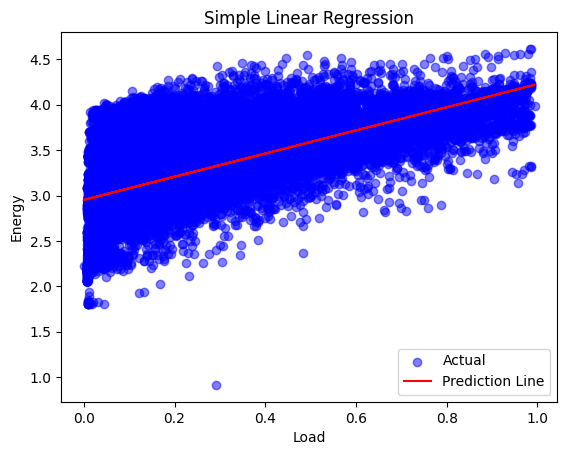

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x_test,y_test, color="blue", alpha=0.5, label="Actual")
plt.plot(x_test, y_pred, color = 'red', label = 'Prediction Line')

plt.xlabel("Load")
plt.ylabel("Energy")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

2. Multiple Linear regression

In [ ]:
#train-test split
from sklearn.model_selection import  train_test_split

x = df[['BS', 'load', 'ESMODE', 'TXpower', 'hour', 'day', 'weekday']]
y = df['Energy']

x_train, x_test , y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
#train the regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(x_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2:', r2_score(y_test, y_pred))

MAE: 0.227098502256525
RMSE: 0.2993234654809694
R^2: 0.5825086232501488


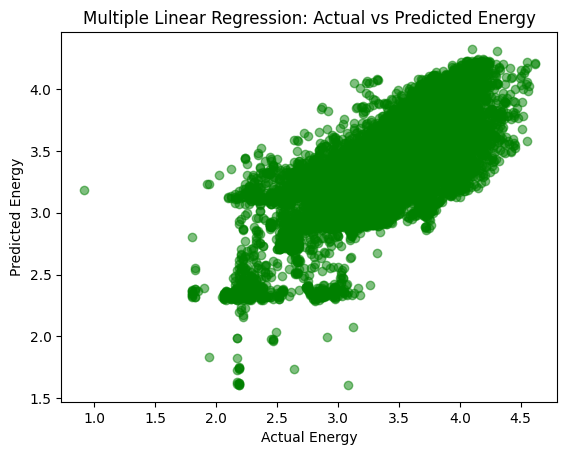

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha = 0.5, color ='green')
plt.xlabel('Actual Energy')
plt.ylabel('Predicted Energy')
plt.title('Multiple Linear Regression: Actual vs Predicted Energy')
plt.show()

iii. Polynomial Regression

In [ ]:
#train-test split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import  train_test_split

x = df[['load']]
y = df['Energy']

x_train_orig, x_test_orig , y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
poly = PolynomialFeatures(degree= 2)
x_train = poly.fit_transform(x_train)
x_test = poly.transform(x_test)



In [ ]:
#train the regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(x_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2:', r2_score(y_test, y_pred))

MAE: 0.2114975724626534
RMSE: 0.2800225701277623
R^2: 0.6346138722576813


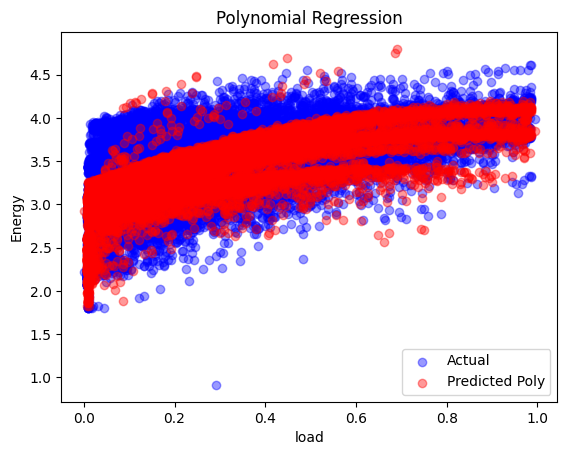

In [ ]:
plt.scatter(x_test_orig,y_test, color = 'blue', alpha = 0.4, label ='Actual')
plt.scatter(x_test_orig, y_pred, color = 'red', alpha = 0.4, label = 'Predicted Poly')

plt.xlabel('load')
plt.ylabel('Energy')
plt.title('Polynomial Regression')
plt.legend()
plt.show()